# Stimatore

In generale, definiremo **stimatore** del parametro incognito $\theta$ una qualsiasi funzione di un campione $(x_1,\cdots,x_n)$:

$\hat{\theta}: (x_1,\cdots,x_n)\mapsto \hat{\theta}(x_1,\cdots,x_n)$

$\hat{\theta}(x_1,\cdots,x_n)$ prende il nome di **stima (puntuale)**.

La determinazione di $\hat{\theta}$ può essere anche definita in base ad un algoritmo.

Tra tutti i possibili stimatori $\hat{\theta}$, la scelta va fatta in base ad alcune proprietà che definiremo.

## Uno stimatore inutile

Ad esempio, il seguente stimatore è legittimo, ma insensibile al campione dei dati:

$\hat{\theta}: (x_1,\cdots,x_n)\mapsto \pi$

Sicuramente non sarà possibile avere alcuna informazione utile sul valore vero $\theta$ da questo stimatore.

## Metodo della massima verosimiglianza

Definiamo come **stimatore di massima verosimiglianza** il valore di $\theta$ che massimizza la funzione di verosimiglianza:

$\displaystyle p(x_1, \cdots, x_n;\theta) = \prod_{i=1}^n p(x_i;\theta)$

Abbiamo visto che, nell'inferenza bayesiana, se assumiamo una PDF a priori $\pi(\theta)$ uniforme (ossia: costante) il valore massimo della PDF a posteriori è il valore che massimizza la funzione di verosimiglianza.

Vedremo che questo approccio è un'ottima scelta anche secondo l'approccio frequentista, sebbene il problema di stimare un parametro sia fondamentalmente e concettualmente molto doverso nei due approcci.


## Distribuzione gaussiana

Assumendo che i diversi $x_i$ abbiano tutti una distribuzione gaussiana con valor medio $\mu$ ignoto e con deviazione standard $\sigma$ invece nota, possiamo costruire diversi stimatori di $\mu$ a partire dagli indicatori che abbiamo definito.

Ad esempio:

* il valor medio, $\bar{x}$;
* la mediana degli $x_i$;
* un valore scelto a caso tra gli $n$ disponibili;
* la media degli $n-m$ valori centrali, ossia: scartiamo gli $m$ valori più estremi. Questa scelta può aver senso se il campione comprende alcuni valori che **non** seguono la distribuzione attesa, ma possono deviare sensibilmente. Si parla di stimatore *robusto*, perché insensibile agli elementi estremi (in inglese: *outliers*).

## Stimatore per una singola osservazione gaussiana

Immaginiamo, per ulteriore semplicità, di avere $n=1$ ed una singola osservazione (o, se volete, misura) $x$.

Definiamo il nostro stimatore $\hat{\mu}$ in maniera ovvia:

$\hat{\mu} = x$,

$\hat{\mu}$ seguirà una distribuzione gaussiana con deviazione standard $\sigma$, che conosciamo.

Possiamo quindi riportare la stima $\hat{\mu}$ con la sua deviazione standard, che interpreteremo come **errore** o **incertezza** su $\hat{\mu}$:

$\mu = \hat{\mu} \pm \sigma$

Equivalentemente, possiamo riportare l'intervallo:

$[\hat{\mu}-\sigma, \hat{\mu}+\sigma]$

<span style="color: red">Nell'approccio frequentista, però, a questo intervallo **non può essere assegnato un significato probabilistico per $\mu$** in quanto $\mu$ non è una variabile casuale!</span>

Possiamo invece considerare di **ripetere la misura di $x$** molte volte, al limite infinite. $\hat{\mu}$, che è uguale ad $x$, sarà una variabile casuale, e ad ogni esperimento avrà un valore diverso. L'intervallo, quindi, di volta in volta sarà diverso. E, nel 68% dei casi (68.27%, per la precisione), conterrà il valore vero, ma incognito. Questa frazione di casi sarà esattamente rispettata solo nel limite di un numero di casi infinito.

In [8]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math

In [9]:
mu_true = 2.5
sigma = 1

In [10]:
x_obs = norm.rvs(loc=mu_true, scale=sigma, size=100)
n_obs = len(x_obs)

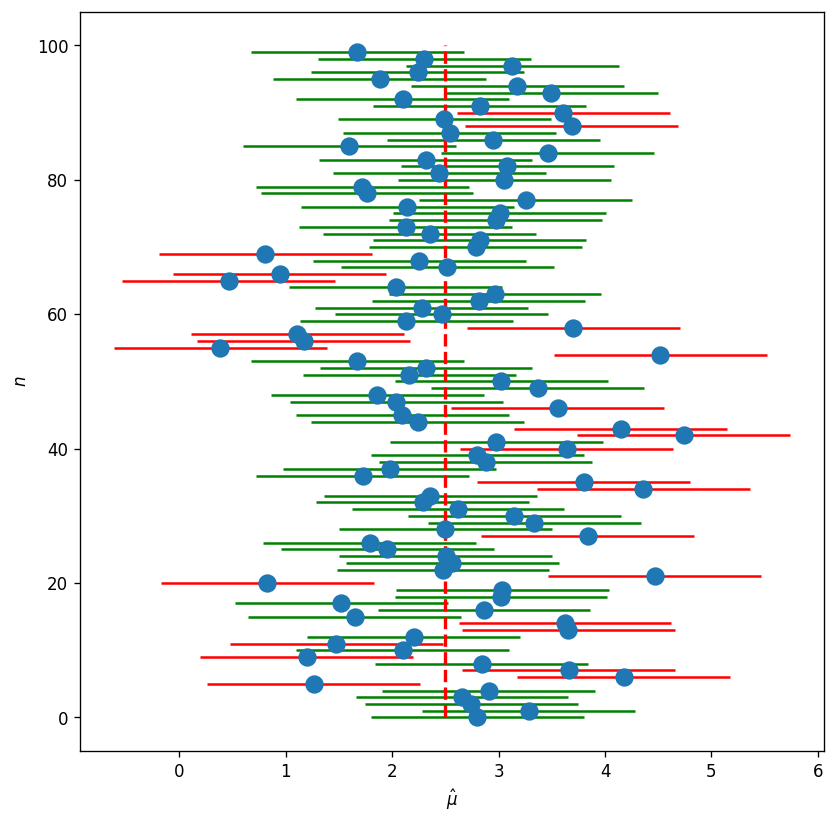

In [11]:
plt.figure(figsize=(8,8), dpi=120)
cols=['red']*n_obs
for i in range(n_obs):
    if abs(x_obs[i]-mu_true)<sigma: cols[i]='green'
plt.errorbar(x_obs, np.arange(0,n_obs), xerr=sigma, fmt='o', markersize=10, ecolor=cols)
plt.plot([mu_true, mu_true], [0,n_obs], color='red', linewidth=2, linestyle='--')
plt.xlabel(r'$\hat{\mu}$')
plt.ylabel(r'$n$')
plt.show()

In [12]:
n_hit = len(x_obs[abs(x_obs-mu_true)<sigma])
f_hit = n_hit/n_obs
print("f. hit: {:.2%}".format(f_hit))

f. hit: 74.00%


# Proprietà di uno stimatore

## Consistenza

Uno stimatore $\hat{\theta}$ di un parametro $\theta$ è *consistente* se converge, in probabilità, al valore vero del parametro sconosciuto $\theta$ quando il numero di misure $n$ tende all'infinito:

$\displaystyle \forall\varepsilon\,\,\,\lim_{n\rightarrow\infty}P\left(\left|\hat{\theta}_n-\theta\,\right|<\varepsilon\right)=1$

Un buono stimatore deve essere consistente.

<span style="color:blue">Lo stimatore inutile $\hat{\theta}=\pi$ non è consistente, mentre lo è la media degli $x_i$ con una distribuzione gaussiana per la stima di $\mu$.</span>

## *Bias*

Il *bias* misura quanto uno stimatore, in media, devia dal valore vero:

$\mathbb{B}\mathrm{ias}(\hat{\theta}) = \mathbb{E}(\hat{\theta}-\theta) = \mathbb{E}(\hat{\theta})-\theta$

Un buono stimatore deve avere bias nullo o almeno molto piccolo.

<span style="color:blue">Il bias dello stimatore inutile $\hat{\theta}=\pi$ vale $\pi-\theta$, ed è ignoto.</span>

## Efficienza

La varianza di uno stimatore, $\mathbb{V}\mathrm{ar}[\hat{\theta}]$, deve essere piccola.
Tuttavia, se lo stimatore è *consistente*, la varianza non può diventare piccola a piacimento.

Esiste un limite a quanto può essere piccola la varianza, che prende il nome di limite di Cramér-Rao.

$\displaystyle \mathbb{V}\mathrm{ar}[\,\hat{\theta}\,]\ge \mathbb{V}\mathrm{ar}_{\mathrm{CR}}[\,\hat{\theta}\,]=
\frac{\left(1+\frac{\displaystyle\partial\,\mathbb{B}\mathrm{ias}(\hat{\theta})}{\displaystyle\partial\,\theta}\right)^2}
{\mathbb{E}\left[\left(
\frac{\displaystyle\partial\log p(x_1,\cdots,x_n;\theta)}{\displaystyle\partial\,\theta}
\right)^2\right]}
$

dove $p(x_1,\cdots,x_N;\theta)$ è la funzione di verosimglianza.

Il denominatore, $\mathbb{E}\left[\left(
\frac{\displaystyle\partial\log p(x_1,\cdots,x_n;\theta)}{\displaystyle\partial\,\theta}
\right)^2\right]$,
prende il nome di *informazione di Fisher*.

Si può dimostrare che, se $p$ soddisfa certe condizioni di regolarità:

$\displaystyle
{\mathbb{E}\left[\left(
\frac{\displaystyle\partial\log p(x_1,\cdots,x_n;\theta)}{\displaystyle\partial\,\theta}
\right)^2\right]} = -{\mathbb{E}\left[\left(
\frac{\displaystyle\partial^2\log p(x_1,\cdots,x_n;\theta)}{\displaystyle\partial\,\theta^2}
\right)\right]}
$

Si può definire **efficienza** il rapporto tra la varianza ideale fornita dal limite di Cramér-Rao, e quella dello stimatore considerato:

$\displaystyle \varepsilon(\hat{\theta}) = \frac{\mathbb{V}\mathrm{ar}_{\mathrm{CR}}[\,\hat{\theta}\,]}{\mathbb{V}\mathrm{ar}[\,\hat{\theta}\,]}$

Un buono stimatore deve avere efficienza alta, possibilmente vicina ad 1.

<span style="color:blue">La varianza dello stimatore inutile $\hat{\theta}=\pi$ è zero, ma questo non riduce la sua inutilità.</span>

# Stimatori di massima versimiglianza

Lo stimatore $\hat{\theta}$ di massima verosimiglianza è dato dal valore di $\theta=\hat{\theta}$ che massimizza la funzione di verosimiglianza che, se gli $x_i$ sono tutti indipendenti, si scrive:

$\displaystyle p(x_1, \cdots, x_n;\theta) = \prod_{i=1}^n p(x_i;\theta)$

Questo stimatore corrisponde alla *moda* della distribuzione a posteriori nell'inferenza bayesiana quando si assume una PDF a priori $\pi(\theta)$ uniforme, come abbiamo già visto.

Molto spesso, equivalentemente, anziché massimizzare $p(x_1, \cdots, x_n;\theta)$, si minimizza:

$\displaystyle -\log p(x_1, \cdots, x_n;\theta) = -\sum_{i=1}^n \log p(x_i;\theta)$

Oppure:

$\displaystyle -2\log p(x_1, \cdots, x_n;\theta) = -\sum_{i=1}^n 2\log p(x_i;\theta)$

Che, in approssimazione gaussiana, risulterà particolarmente conveniente da usare.


## Proprietà degli stimatori di massima versimiglianza

Si può dimostrare che gli stimatori di massima verosimiglianza hanno buone prestazioni rispetto alle proprietà elencate sopra. In particolare:
* gli stimatori di massima verosimiglianza sono *consistenti*
* se hanno un *bias*, il bias tende a zero per $n$ che tende ad $\infty$
* l'*efficienza* di uno stimatore di massima verosimiglianza tende ad 1 per $n\rightarrow\infty$

Inoltre, lo stimatore è invariante per riparametrizzazione. Se si definisce:

$\xi = \xi(\theta)$

oppure, passando alla funzione inversa:

$\theta = \theta(\xi)$

e si riscrive la funzione di verosimiglianza in funzione di $\xi$:

$\displaystyle p_\xi(x_1, \cdots, x_n;\xi) = p_\theta(x_1, \cdots, x_n;\theta(\xi))$

Il valore di $\xi=\hat{\xi}$ che massimizza $p_\xi$ è $\hat{\xi} = \xi(\hat{\theta})$, dove $\hat{\theta}$ massimizza $p_\theta$ espressa in funzione di $\theta$.

<span style="color: red">Abbiamo visto che, nel caso dell'inferenza bayesiana, la riparametrizzazione non conduce necessariamente alla stessa stima del valore più probabile, perché questo dipende dall'assunzione che si fa sulla prior. Una prior uniforme rispetto a $\theta$ non è necessariamente uniforme rispetto a $\xi$, come si è visto nel caso della distribuzione esponenziale.</span>

# Stima degli errori col metodo di massima verosimiglianza

Uno stimatore $\hat{\theta}$ è una variabile casuale a sua volta determinata dai valori delle variabili casuali $x_1,\cdots,x_n$.

La sua varianza può essere determinata dalla distribuzione degli $x_1,\cdots,x_n$, ma non è sempre facile da calcolare.

Esistono metodi approssimati che vedremo nel seguito.

# Più variabili gaussiane

Se le nostre misure seguono distribuzioni gaussiane, ciascuna con lo stesso valor medio $\mu$ ignoto e deviazioni standard diverse e note, $\sigma_i$, abbiamo:

$\displaystyle p(x_1, \cdots, x_n;\mu) = \prod_{i=1}^n p(x_i;\mu) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma_i^2}}
\exp\left[-\frac{(x_i-\mu)^2}{2\sigma_i^2}\right]$

Per massimizzare $p(x_1, \cdots, x_n;\mu)$ conviene minimizzare $-2\log p(x_1, \cdots, x_n;\mu)$:

$\displaystyle -2\log p(x_1, \cdots, x_n;\mu) = \sum_{i=1}^n
\frac{(x_i-\mu)^2}{\sigma_i^2}
+2\sum_{i=1}^n\log \sqrt{2\pi\sigma_i^2} = \sum_{i=1}^n
\frac{(x_i-\mu)^2}{\sigma_i^2} + \mathrm{cost.}
$

L'ultimo termine non dipende da $\mu$ e non contribuisce al calcolo del minimo.

Va quindi minimizzato il termine:

$\displaystyle \chi^2(\mu) = \sum_{i=1}^n
\frac{(x_i-\mu)^2}{\sigma_i^2} = \sum_{i=1}^n z_i^2
$

imponendo: $\displaystyle\frac{\partial\chi^2(\mu)}{\partial\mu}=0$:

$\displaystyle \frac{\partial\chi^2(\mu)}{\partial\mu} = \sum_{i=1}^n\frac{\partial}{\partial\mu}
\frac{(x_i-\mu)^2}{\sigma_i^2} =
2\sum_{i=1}^n\frac{\mu-x_i}{\sigma_i^2}=
2\left(\mu\sum_{i=1}^n\frac{1}{\sigma_i^2}-\sum_{i=1}^n\frac{x_i}{\sigma_i^2}\right)=0
$

quindi:

$\displaystyle
\mu\sum_{i=1}^n\frac{1}{\sigma_i^2}=\sum_{i=1}^n\frac{x_i}{\sigma_i^2}
$

che conduce alla *media pesata*:

$\displaystyle
\hat{\mu} = \sum_{i=1}^n w_ix_i
$

Con i *pesi* $w_i$, definiti in modo che la loro somma valga 1, come:

$\displaystyle w_i = \frac{1/\sigma_i^2}{1/\sigma^2}$

dove a sua volta $\sigma$ è definito da:

$\displaystyle \frac{1}{\sigma^2} = \sum_{i=1}^n\frac{1}{\sigma_i^2}$

Se abbiamo pesi tutti uguali, ossia errori $\sigma_i$ tutti uguali, la stima di $\mu$ diventa semplicemente la media aritmetica perchè $w_i = 1/n$:

$\hat{\mu} = \bar{x}$

# Varianza della media pesata

La varianza della media pesata si può calcolare direttamente:

$\displaystyle \mathbb{V}\mathrm{ar}\left[\sum_{i=1}^n w_ix_i\right] =
\sum_{i=1}^nw_i^2 \mathbb{V}\mathrm{ar}[x_i]=
\sum_{i=1}^nw_i^2 \sigma_i^2=
\sum_{i=1}^n\left(\frac{1/\sigma_i^2}{1/\sigma^2}\right)^2 \sigma_i^2=
\frac{\sum_{i=1}^n\left(1/\sigma_i^2\right)}{(1/\sigma^2)^2}=
\sigma^2
$

Nel caso di varianze tutte uguali, $\sigma_i=\sigma_0$, quindi $w_i=1/n$, per ogni $i$, abbiamo:

$\displaystyle\sigma = \frac{\sigma_0}{\sqrt{n}}$


## Stima della deviazione standard in una Gaussiana

Consideriamo la funzione di verosimiglianza osservata in precedenza, ma questa volta consideriamo sia $\mu$ che $\sigma^2$ come parametri incogniti che vogliamo stimare:

$\displaystyle p(x_1, \cdots, x_n;\mu, \sigma^2) = \prod_{i=1}^n p(x_i;\mu) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left[-\frac{(x_i-\mu)^2}{2\sigma^2}\right]$

Va notato che stimare $\sigma^2$ anziché $\sigma$ semplificherà il calcolo. Abbiamo già notato che la stiama di massima verosimiglianza non cambia per riparametrizzazione ($\sigma\rightarrow\sigma^2$ in questo caso).

Passando al logarimo, otteniamo:

$-2\displaystyle \log p(x_1, \cdots, x_n;\mu, \sigma^2) = -2\sum_{i=1}^n \log p(x_i;\mu) = -2\sum_{i=1}^n \log \frac{1}{\sqrt{2\pi\sigma^2}} +\sum_{i=1}^n\frac{(x_i-\mu)^2}{\sigma^2} =$

$\displaystyle = {n} \log 2\pi\sigma^2 +\frac{\sum_{i=1}^n{(x_i-\mu)^2}}{\sigma^2} =\\
= \displaystyle {n} \left(\log 2\pi+\log\sigma^2\right) +\frac{\sum_{i=1}^n{(x_i-\mu)^2}}{\sigma^2} 
$ 

Calcolando la derivata del **doppio** del logaritmo rispetto a $\sigma^2$ otteniamo:

$\displaystyle -2\frac{\partial\,\log p(x_1, \cdots, x_n;\mu, \sigma^2)}{\partial\sigma^2} =
\frac{n}{\sigma^2}-\frac{1}{(\sigma^2)^2}\sum_{i=1}^n(x_i-\mu)^2 = 
\frac{n}{\sigma^4}\left(
\sigma^2 -  \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2
\right) = 0
$

Ponendo uguale a zero, simultaneamente alla derivata rispetto a $\mu$, si otterà la stima:

$\displaystyle \hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n(x_i-\hat{\mu})^2$

dove $\hat{\mu}=\bar{x}$.

## Bias della stima di $\sigma^2$ di massima verosimiglianza

Si può dimostrare, però, che $\hat{\sigma}^2$ è affetto da *bias* che, come in generale avviene per le stime di massima verosimiglianza, decresce con $n$.

Il bias si può calcolare come:

$\displaystyle \mathbb{E}[\hat{\sigma}^2] = \mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n (x_i-\bar{x})^2\right] =
\mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n(x_i^2-2\bar{x}x_i + \bar{x}^2)\right] =
\frac{1}{n}\mathbb{E}\left[\sum_{i=1}^n(x_i^2-2\bar{x}x_i + \bar{x}^2)\right] =$
$\displaystyle=\frac{1}{n}\left[\sum_{i=1}^n(\mathbb{E}[x_i^2]-2\mathbb{E}[\bar{x}x_i] + \mathbb{E}[\bar{x}^2])\right] =
\mathbb{E}[{x^2}] - 2\frac{1}{n}\left[\sum_{i=1}^n\mathbb{E}[\bar{x}x_i]\right] + \mathbb{E}[\bar{x}^2] =
\mathbb{E}[{x^2}] - 2\mathbb{E}\left[\bar{x}\frac{1}{n}\sum_{i=1}^nx_i\right] + \mathbb{E}[\bar{x}^2] =
\mathbb{E}[{x^2}]-\mathbb{E}[\bar{x}^2]
$

Considerando che

$\sigma^2 = \mathbb{E}[{x^2}] - \mathbb{E}[x]^2 = 
\mathbb{E}[{x^2}] - \mu^2
$ 

e 

$\displaystyle\sigma_\bar{x}^2 = \mathbb{E}[\bar{x}^2] - \mathbb{E}[\bar{x}]^2 =
\mathbb{E}[\bar{x}^2] - \mu^2 = \frac{\sigma^2}{n}
$

Possiamo scrivere:

$\displaystyle \mathbb{E}[\hat{\sigma}^2] = 
\mathbb{E}[{x^2}]-\mathbb{E}[\bar{x}^2] =
\left(\mathbb{E}[{x^2}]-\mu^2\right)-\left(\mathbb{E}[\bar{x}^2]-\mu^2\right) =
\sigma^2 - \sigma_\bar{x}^2 = \sigma^2 - \frac{\sigma^2}{n}
$

Abbiamo sopra dimostrato, per la varianza della media, che $\sigma_{\bar{x}}^2 = \sigma^2/n$, quindi:

$\displaystyle \mathbb{E}[\hat{\sigma}^2] = 
\sigma^2 - \frac{1}{n}\sigma^2 = \frac{n - 1}{n}\sigma^2
$

Quindi il bias vale:

$\displaystyle \mathbb{E}[\hat{\sigma}^2] - \sigma^2= 
-\frac{1}{n}\sigma^2
$

Ossia: tendo a sottostimare $\sigma^2$.


Il valore atteso, quindi, di $\sigma_x^2$ differisce da $\sigma$. Possiamo però definire un nuovo stimatore:

$\displaystyle s^2 = \frac{n}{n-1} \hat{\sigma}^2 = 
\frac{1}{n-1}\sum_{i=1}^n(x_i-\hat{\mu})^2$

Questo stimatore, differente da quello di massima verosimiglianza, avrà bias nullo per costruzione.

Più in generale, la stima della deviazione standard avrà una correzione del denominatore che passerà da $n$ a $n-k$ dove $k$ è il numero di parametri (*gradi di libertà*) che è stato determinato nella stima di massima verosimiglianza.

Ad esempio, vedremo che in un *fit* lineare sono determinati due parametri (intercetta e pendenza di una retta). In quel caso, la deviazione standard andrà corretta per un termine $n/(n-2)$.

### Deviazione standard in ```numpy```

Nelle possibili implementazioni python della deviazione standard è in genere possibile specificare il **numero di gradi di libertà** da usare nel calcolo del denominatore.

Ad esempio, la funzione [```std```](https://numpy.org/doc/stable/reference/generated/numpy.std.html) ha un parametro opzionale ```ddof```, che di default vale zero, che si può utilizzare per specificare quando sottrarre ad $n$ nel denominatore.

# Stima della varianza dalla funzione di verosimiglianza

Se gli $x_i$ siano correlati ciascuno valor medio $\mu_i$ è ignoto, la funzione di verosimiglianza ha la forma di una gaussiana multidimensionale con una matrice di correlazione $C$ non diagonale:

$\displaystyle p(x_i,\cdots,x_n; \mu_1, \cdots, \mu_n, C) = \frac{1}{(2\pi)^{n/2}\left|C\right|^{-1/2}}\exp\left[
-\frac{1}{2}\sum_{i,j}(x_i-\mu_i)\,C_{ij}^{-1}\,(x_j-\mu_j)
\right]$

Si ottiene la stima dei diversi $\mu_i$ minimizzando $-2\log p$, quindi $\hat{\mu}_i = x_i$,
mentre la matrice di correlazione dei vari $\hat{\mu}_i$ si può dimostrare semplicemente che è la matrice $C$.

La matrice $C$ si può anche ricavare come:

$\displaystyle C_{ij}^{-1} =-\frac{\partial^2 \log(p(x_i,\cdots,x_n; \mu_i, \cdots, \mu_n))}{\partial\mu_i\,\partial\mu_j}
$

<span style="color: blue">Useremo questa formula, in maniera approssimata, per determinare la matrice di correlazione anche nel caso in cui $p$ non segua esattamente una distribuzione gaussiana, ma potremo approssimarla, almeno nella prossimità del minimo. In prossimità del minimo, infatti, $-2\log p$, se soddisfa condizioni di regolarità, può essere approssimato con una parabola. E l'approssimazione parabolica di $-2\log p$ equivale all'approssimazione gaussiana di $p$. 
</span>

In particolare, gli errori si ottengono come:

$\displaystyle \boxed{\frac{1}{\sigma_{\hat{\mu}_i}^2} =-\left.\frac{\partial^2 \log(p(x_1,\cdots,x_n; \mu_1, \cdots, \mu_n))}{\partial\mu_i^2}\right|_{\mu_i=\hat{\mu}_i}}
$

Ricordiamo il limite della varianza di Cramer Rao:

$\displaystyle \mathbb{V}\mathrm{ar}[\,\hat{\theta}\,]\ge \mathbb{V}\mathrm{ar}_{\mathrm{CR}}[\,\hat{\theta}\,]=
\frac{\left(1+\frac{\displaystyle\partial\,\mathbb{B}\mathrm{ias}(\hat{\theta})}{\displaystyle\partial\,\theta}\right)^2}
{\mathbb{E}\left[\left(
\frac{\displaystyle\partial\log p(x_1,\cdots,x_n;\theta)}{\displaystyle\partial\,\theta}
\right)^2\right]}
$

Nel caso asintotico del metodo di massima verosimiglianza abbiamo:


$\displaystyle \mathbb{V}\mathrm{ar}[\,\hat{\theta}\,] \simeq
\frac{1}
{\mathbb{E}\left[\left(
\frac{\displaystyle\partial\log p(x_1,\cdots,x_n;\theta)}{\displaystyle\partial\,\theta}
\right)^2\right]}
$

Abbiamo già detto che, se $p$ soddisfa certe condizioni di regolarità:

$\displaystyle
{\mathbb{E}\left[\left(
\frac{\displaystyle\partial\log p(x_1,\cdots,x_n;\theta)}{\displaystyle\partial\,\theta}
\right)^2\right]} = -{\mathbb{E}\left[\left(
\frac{\displaystyle\partial^2\log p(x_1,\cdots,x_n;\theta)}{\displaystyle\partial\,\theta^2}
\right)\right]}
$

Approssimando il valore atteso con il valore ottenuto dal singolo campione osservato si ottiene di nuovo la formula che si era ottenuta con l'approssimazione gaussiana.

# Scan della funzione di verosimiglianza

Un altro metodo per determinare gli errori consiste nello **scan della funzione $-2\log p$** che, nel caso gaussiano, è una funzione parabolica intorno al minimo.

Nel caso più semplice:

$\displaystyle p(x;\mu) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$

abbiamo:

$\displaystyle -2\log p(x;\mu) = \frac{(x-\mu)^2}{\sigma^2} + \log 2\pi\sigma$

dove l'ultimo termine può essere omesso, in quanto è costante ed è ininfluente per il calcolo del minimo.

<span style="color:blue;">In pratica, questo metodo sarà usato anche per i casi in cui la funzione di verosimiglianza non è gaussiana e rappresenta una approssimazione migliore per il calcolo delle incertezze rispetto alla derivata seconda del logaritmo della funzione di verosimiglianza. Per casi non gaussiani potrannno esserci **errori asimmetrici**. L'interpretazione più corretta sarà data dal concetto di **intervallo di confidenza**.</span>

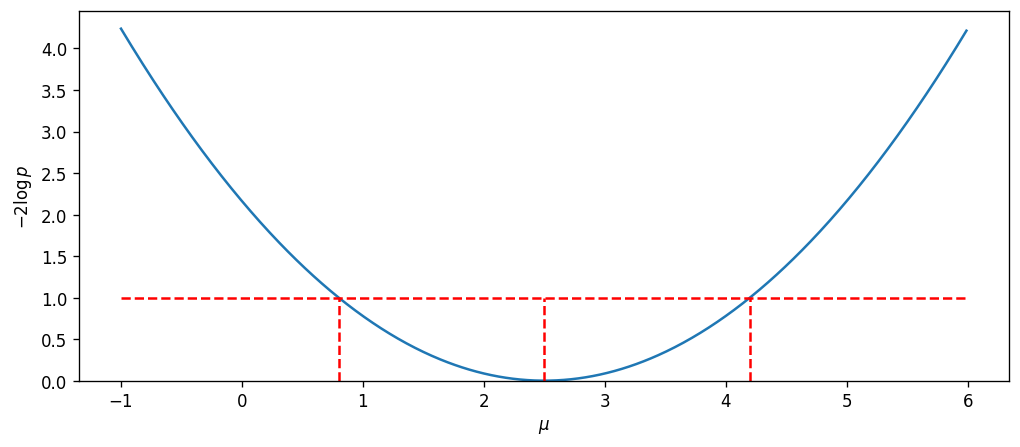

In [14]:
import matplotlib.pyplot as plt
import numpy as np
x_obs =2.5
sigma=1.7
def lik(mu):
    return ((x_obs-mu)/sigma)**2
lik_v = np.vectorize(lik)
x=np.arange(-1,6,0.01)
y=lik_v(x)
plt.figure(figsize=(10, 4), dpi=120)
plt.plot(x,y)
plt.plot((x[0],x[-1]),(1,1), color='r', linestyle='--')
plt.plot((x_obs,x_obs), (0,1), color='r', linestyle='--')
plt.plot((x_obs-sigma,x_obs-sigma), (0,1), color='r', linestyle='--')
plt.plot((x_obs+sigma,x_obs+sigma), (0,1), color='r', linestyle='--')
plt.xlabel('$\mu$')
plt.ylabel(r'$-2\log p$')
plt.ylim(0)
plt.show()

## Stima di un parametro binomiale

Se si osserva un valore $n=n^\star$, si può stimare, ispirandoci alla legge dei grandi numeri:

$\displaystyle\hat{p} = \frac{n^\star}{N}$

Questa è anche la stima di $p$ di massima verosimiglianza. Infatti, la distribuzione binominale è:

probabilità di avere un numero $n$ di esiti positivi (ossia $n$ palline rosse estratte) è pari a:

$P(n;N, p) = \left(\begin{array}{c} n \\ N \end{array}\right) p^n(1-p)^{N-n} = \frac{\displaystyle N!}{\displaystyle n!(N-n)!}p^n(1-p)^{N-n}$

Il massimo di $P(n;N,p)$ rispetto a $p$ si ottiene ponendo:

$\displaystyle \frac{\partial P(n;N,p)}{\partial p}=0$

ossia:

$\displaystyle \frac{\partial p^n(1-p)^{N-n}}{\partial p}=p^{n-1}(1-p)^{N-n-1}(n-Np)=0$

da cui $\hat{p}$ è il valore di $p$ che deve soddisfare, per $n= n^\star$:

$\displaystyle p=\frac{n}{N}$

La varianza di una variabile binomiale è pari a $\sigma_n = \sqrt{N p\,(1-p)}$. Per questo motivo, spesso si approssima l'errore su $\hat{p}$, ancora ispirandoci alla legge dei grandi numeri, considerando che, per grandi $N$ si può approssimare $p$ a $\hat{p}$, e quindi:

$\displaystyle\sigma_{\hat{p}} = \sqrt{\frac{\hat{p}\,(1-\hat{p})}{N}}$

Si puà anche detrminare $\sigma_{\hat{p}}$ dalla relazione approssimata:

$\displaystyle \frac{1}{\sigma_{\hat{p}}^2} = -\left.\frac{\partial^2\log P(n^\star; N, p)}{\partial p^2}\right|_{p=\hat{p}} = -\frac{\partial^2}{\partial p^2}\log\frac{ N!}{n^\star!(N-n^\star)!} - \left.\frac{\partial^2[n^\star\log p +(N-n^\star)\log(1-p)]}{\partial p^2}\right|_{p=\hat{p}} = $

$\displaystyle = -\left.\frac{\partial}{\partial p}\left(\frac{n^\star}{p} - (N-n^\star)\frac{1}{1-p}\right)\right|_{p=\hat{p}} = \left(\frac{n^\star}{\hat{p}^2} + (N-n^\star)\frac{1}{(1-\hat{p})^2}\right) = $

$\displaystyle = \left(\frac{N}{\hat{p}} + \frac{N}{1-\hat{p}}\right) = \frac{N}{\hat{p}(1-\hat{p})}$

Che è la stessa espressione di cui sopra.

Questa stima, tuttavia, soffre di evidenti patologie per $n^\star=0$ e $n^\star=N$, dove $\hat{p}=0$ oppure $1$, e quindi $\sigma_{\hat{p}}=0$.

In particolare, per un rivelatore di alta efficienza $\varepsilon = p \simeq 1$, se il numero di conteggi $N$ è basso, il valore $n=N$ è anche il valore più probabile. Questo causerebbe una stima affetta da errore nullo. Oltre ad essere una stima patologica dell'errore, sarebbe un errore più piccolo di quanto si otterrebbe con un numero di conteggi $N$ molto maggiore, sufficiente ad evidenziare la, seppur piccola, inefficienza $1-\varepsilon$.

Nelle lezioni successive discuteremo come stimare $\hat{p}$ in maniera più corretta dal punto di vista frequentista.

## Stima di un parametro poissoniano

Analogamente al caso binomiale, si può stimare che il parametro $\nu$ di una distribuzione di Poisson come:
    
$\hat{\nu} = n^\star$
    
Dove $n=n^\star$ è il numero di conteggi osservato.

Infatti:

$\displaystyle P(n; \nu) = \frac{e^{-\nu}\nu^n}{n!}$

e quindi la funzione di verosimiglianza è massima per:

$\displaystyle \frac{\partial}{\partial \nu}\log\frac{e^{-\nu}\nu^{n^\star}}{n^\star!} = \frac{\partial}{\partial \nu}\left(-\nu + n^\star\log\nu -\log n^\star!\right)  = 0$

ossia:

$\displaystyle 1 -\frac{n^\star}{\nu} = 0$

quindi per $\nu= n^\star$.



La stima dell'errore è $\sigma_{\hat{\nu}} = \sqrt{n^\star}$. Infatti:


$\displaystyle \frac{1}{\sigma^2_{\hat{\nu}}} = -\left.\frac{\partial^2\log P(n^\star;\nu)}{\partial \nu^2}\right|_{\nu=\hat{\nu}} = \left.\frac{\partial^2 (\nu - n^\star\log\nu + \log n^\star!)}{\partial \nu^2}\right|_{\nu=\hat{\nu}}  = \left.\frac{\partial (1 - n^\star/\nu)}{\partial \nu}\right|_{\nu=\hat{\nu}}  = \frac{n^\star}{\hat{\nu}^2}  = \frac{1}{n^\star}$

Quindi:

$\sigma_{\hat{\nu}} = \sqrt{n^\star}$